In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 
from datetime import datetime
from scipy.optimize import minimize

In [ ]:
from scipy.optimize import minimize

In [2]:
import mahdi as ma


In [3]:
import pandas as pd
ind = pd.read_csv("ind30_m_vw_rets.csv", header=0, index_col=0)/100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')

In [4]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [5]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [6]:
ind.columns = ind.columns.str.strip()

In [7]:
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [8]:
ind.shape

(1110, 30)

In [9]:
import pandas as pd

# ایجاد یک سری از اعداد
numbers = pd.Series([1, 2, 3, 4, 5])

# استفاده از تابع .prod() برای محاسبه محصول این اعداد
product_of_numbers = numbers.prod()

print(product_of_numbers)


120


12 برای ماهانه 

252 روزانه

52 هفتگی

In [10]:
# add to ma

def annualize_rets(s, periods_per_year):
    '''
    بازده سالانه را محاسبه میکند
    periods_per_year ===> 12, 52, 252, 
    '''

    growth = (1 + s).prod()
    n_period_growth = s.size

    return growth**(periods_per_year/n_period_growth) - 1



In [11]:
annualize_rets(ind,12)

Food     0.003384
Beer     0.003786
Smoke    0.003854
Games    0.002933
Books    0.002542
Hshld    0.002984
Clths    0.002984
Hlth     0.003687
Chems    0.003404
Txtls    0.002672
Cnstr    0.002760
Steel    0.002193
FabPr    0.003126
ElcEq    0.003460
Autos    0.003011
Carry    0.003398
Mines    0.002444
Coal     0.002024
Oil      0.003234
Util     0.002881
Telcm    0.002958
Servs    0.003461
BusEq    0.003560
Paper    0.003367
Trans    0.002695
Whlsl    0.002177
Rtail    0.003407
Meals    0.003383
Fin      0.003126
Other    0.002219
dtype: float64

In [12]:


def annualize_vol(s, periods_per_year, ddof=1):
    '''
    نوسان سالانه را محاسبه میکند
    periods_per_year ===> 12, 52, 252,  
    '''

    return s.std(ddof=ddof) * (periods_per_year)**(0.5)

       
   

In [13]:
import pandas as pd

# ایجاد یک DataFrame ساده با یک ستون اعداد
df = pd.DataFrame({'numbers': [1, 2, 3, 4, 5]})

# استفاده از تابع aggregate برای محاسبه میانگین و حداکثر
result = df.aggregate(['mean', 'max'])

print(result)


      numbers
mean      3.0
max       5.0


In [14]:



def sharpe_ratio(s, risk_free_rate, periods_per_year, v=None):
    '''
    محاسبه نسبت شارپ سالانه 
    periods_per_year ===> 12, 52, 252,  
    '''

    

        # نرخ سالانه بدون ریسک را به دوره تبدیل میکنیم با این فرض که:
        # RFR_year = (1+RFR_period)^{periods_per_year} - 1.
    rf_to_period = (1 + risk_free_rate)**(1/periods_per_year) - 1        
    excess_return = s - rf_to_period
    # اکنون، بازده اضافی را سالانه می کنیم
    ann_ex_rets = annualize_rets(excess_return, periods_per_year)
    # محاسبه نوسانات سالانه
    ann_vol = annualize_vol(s, periods_per_year)
    return ann_ex_rets / ann_vol
    
   

In [15]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [16]:
sharpe_ratio(ind, 0.03, 12).sort_values()

Coal     0.002767
Steel    0.004129
Whlsl    0.004701
Other    0.005267
Mines    0.005780
Books    0.006279
Games    0.006300
Txtls    0.006339
Trans    0.006978
Autos    0.007365
Cnstr    0.007450
FabPr    0.008572
Servs    0.008593
Fin      0.009119
Carry    0.009201
ElcEq    0.009423
Clths    0.009490
Hshld    0.009951
Util     0.009953
Oil      0.010657
Meals    0.010710
BusEq    0.011011
Chems    0.011098
Beer     0.011256
Rtail    0.011723
Paper    0.011742
Telcm    0.012414
Hlth     0.014029
Smoke    0.014269
Food     0.014638
dtype: float64

<Axes: title={'center': ' 1926-2018'}>

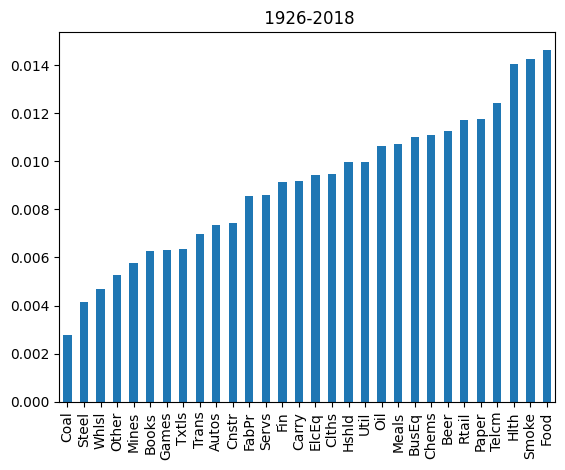

In [17]:
sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title=" 1926-2018")

<Axes: title={'center': 'Sharp ratio from 2000'}>

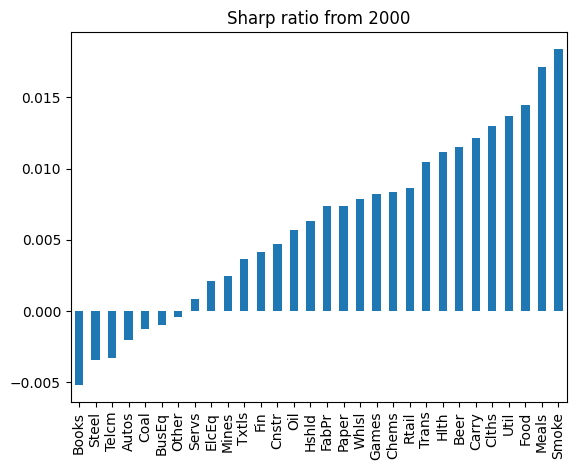

In [18]:
sharpe_ratio(ind["2000":], 0.03, 12).sort_values().plot.bar(title='Sharp ratio from 2000')

<Axes: title={'center': 'Sharp ratio from 2015'}>

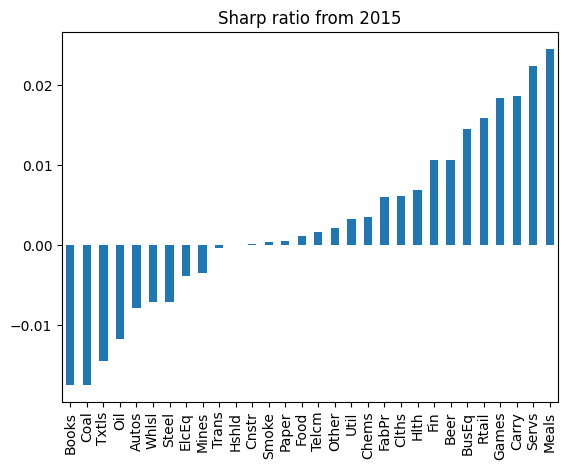

In [19]:
sharpe_ratio(ind["2015":], 0.03, 12).sort_values().plot.bar(title='Sharp ratio from 2015')

In [20]:


def portfolio_return(weights, returns):
    """
    بازده پورتفولیو را از بازده و وزن تشکیل دهنده محاسبه می کند
    weights ====> numpy array or Nx1 matrix  
    returns ====> numpy array or Nx1 matrix
    """
    return weights.T @ returns


In [21]:


def portfolio_vol(weights, covmat):
    """
    نوسان پورتفولیو را از روی ماتریس کوواریانس و وزن اجزای تشکیل دهنده محاسبه می کند
    weights ====> numpy array or Nx1 matrix
    covmat  ====> N x N matrix
    """
    weights=np.array(weights)
    return (weights.T @ covmat @ weights)**0.5

In [22]:
ind = ma.get_ind_returns()
er = annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [23]:
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002609,0.002379,0.002061,0.000846,0.001035,0.001374,0.001733,0.001230,0.001414,0.001216,...,0.000667,0.000237,-0.000315,0.001429,0.001534,0.000740,0.001363,0.001230,0.002132,0.001057
Beer,0.002379,0.005264,0.001359,0.001348,0.000865,0.002804,0.001704,0.001955,0.001460,0.002005,...,0.001146,0.000438,0.000007,0.001710,0.002284,0.000697,0.001690,0.001822,0.002571,0.001383
Smoke,0.002061,0.001359,0.008349,0.000379,-0.000128,0.001167,0.000950,0.001038,0.000853,0.000779,...,0.000062,-0.000218,-0.000120,0.001327,0.000396,0.001707,0.000105,0.000703,0.001312,0.001741
Games,0.000846,0.001348,0.000379,0.003773,0.001726,0.001206,0.002189,0.001433,0.001775,0.001422,...,0.001922,0.002848,0.003434,0.001852,0.001578,0.001966,0.001872,0.001561,0.002416,0.002382
Books,0.001035,0.000865,-0.000128,0.001726,0.002612,0.001025,0.002361,0.000758,0.001731,0.001459,...,0.001918,0.002367,0.001944,0.001638,0.001776,0.001392,0.002223,0.001189,0.002261,0.001442
Hshld,0.001374,0.002804,0.001167,0.001206,0.001025,0.003300,0.001320,0.001473,0.001413,0.001364,...,0.001060,0.001310,0.001102,0.001873,0.001582,0.000683,0.001378,0.001202,0.001912,0.001580
Clths,0.001733,0.001704,0.000950,0.002189,0.002361,0.001320,0.005655,0.000834,0.002932,0.002472,...,0.001436,0.001625,0.000834,0.003165,0.002862,0.001934,0.003013,0.002721,0.003210,0.002299
Hlth,0.001230,0.001955,0.001038,0.001433,0.000758,0.001473,0.000834,0.002565,0.000474,0.000608,...,0.001204,0.001651,0.001535,0.000650,0.000944,0.001056,0.000869,0.000986,0.001617,0.001258
Chems,0.001414,0.001460,0.000853,0.001775,0.001731,0.001413,0.002932,0.000474,0.003276,0.001868,...,0.001004,0.001203,0.001031,0.002920,0.002196,0.001404,0.001808,0.001646,0.002469,0.002059
Txtls,0.001216,0.002005,0.000779,0.001422,0.001459,0.001364,0.002472,0.000608,0.001868,0.003117,...,0.000907,0.000666,0.000702,0.002058,0.001929,0.001610,0.001805,0.001250,0.001986,0.001811


In [24]:
l = ["Food", "Beer", "Smoke", "Coal"]

In [25]:
er[l]

Food     0.003689
Beer     0.004410
Smoke    0.003419
Coal     0.011631
dtype: float64

In [26]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [27]:
ew = np.repeat(0.25, 4)


In [28]:
portfolio_vol(ew, cov.loc[l,l])

0.055059195776437045

In [29]:
import numpy as np

n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]


In [30]:
type(weights)

list

In [31]:
len(weights)

20

In [32]:
weights[0]

array([0., 1.])

In [33]:
weights[4]

array([0.21052632, 0.78947368])

In [34]:
weights[19]

array([1., 0.])

<Axes: xlabel='V', ylabel='R'>

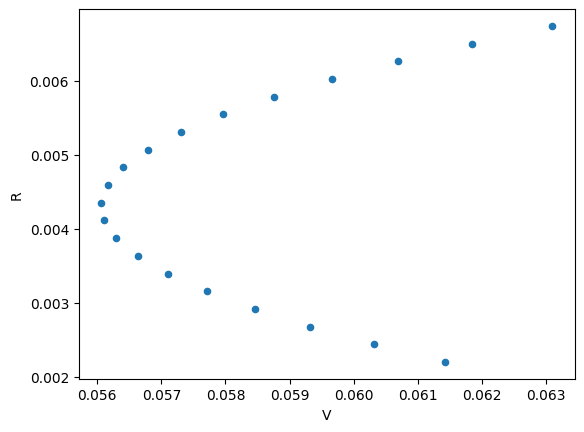

In [35]:
l = ["Games", "Fin"]
rets = [portfolio_return(w, er[l]) for w in weights]
vols = [portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"R": rets, "V": vols})
ef.plot.scatter(x="V", y="R")

In [36]:
#add to msj

def plot_ef2(n_points, er, cov):
    """
    مرز کارا 2 دارایی را ترسیم می کند
    """
    if er.shape[0] != 2 :
        raise ValueError("plot_ef2 can only plot 2-asset frontiers")
    weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style=".-")

<Axes: xlabel='Volatility'>

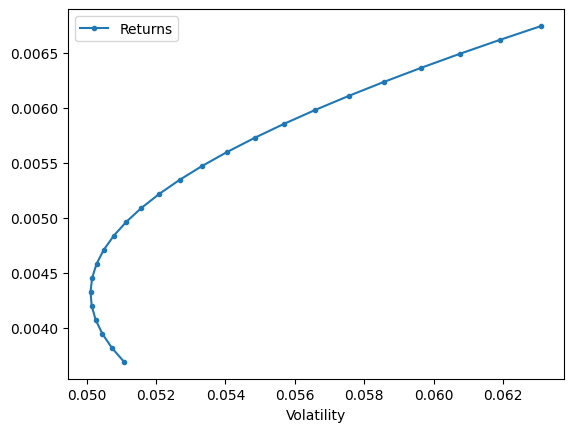

In [37]:
l = ["Fin", "Food"]
plot_ef2(25, er[l].values, cov.loc[l,l])

In [38]:
ind = ma.get_ind_returns()
er = annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [39]:
er

Food     0.003689
Beer     0.004410
Smoke    0.003419
Games    0.002202
Books    0.005739
Hshld    0.004223
Clths    0.002543
Hlth     0.007375
Chems    0.002490
Txtls   -0.001454
Cnstr    0.002695
Steel    0.003659
FabPr    0.003433
ElcEq    0.008063
Autos    0.002598
Carry    0.005359
Mines   -0.001833
Coal     0.011631
Oil      0.005115
Util     0.004550
Telcm    0.003867
Servs    0.005398
BusEq    0.008051
Paper    0.003096
Trans    0.002292
Whlsl    0.003976
Rtail    0.006298
Meals    0.002177
Fin      0.006743
Other    0.001416
dtype: float64

In [40]:
# برای یافتن وزن های بهینه، به تابعی نیاز داریم که نوسانات را برای یک سطح بازده معین به حداقل برساند.



from scipy.optimize import minimize

def minimize_volatility(rets, covmatrix, target_return=None):

    n_assets = rets.shape[0]    
    # حدس اولیه
    init_guess = np.repeat(1/n_assets, n_assets)
    weights_constraint = {
        "type": "eq",
        "fun": lambda w: 1.0 - np.sum(w)  
    }
    if target_return is not None:
        return_constraint = {
            "type": "eq",
            "args": (rets,),
            "fun": lambda w, r: target_return - portfolio_return(w, r)
        }
        constr = (return_constraint, weights_constraint)
    else:
        constr = weights_constraint
        
    result = minimize(portfolio_vol, 
                      init_guess,
                      args = (covmatrix,),
                      method = "SLSQP",
                      options = {"disp": False},
                      constraints = constr,
                      bounds = ((0.0,1.0),)*n_assets ) 
    return result.x

اکنون که می‌توانیم وزن‌هایی را برای به حداقل رساندن انحراف معیار با بازده هدف پیدا کنیم، می‌توانیم مرز کارا را با تقسیم دامنه از بالاترین به پایین‌ترین بازده ممکن در یک شبکه، و یافتن پورتفولیویی که حداقل نوسان را هدف قرار می‌دهد، رسم کنیم.

In [41]:


def optimal_weights(n_points, rets, covmatrix, periods_per_year):

    target_rets = np.linspace(rets.min(), rets.max(), n_points)    
    weights = [minimize_volatility(rets, covmatrix, target) for target in target_rets]
    return weights

### 


اکنون ما سری های زمانی برخی از سهام های بورس ایالات متحده را دریافت خواهیم کرد و خواهیم دید که چگونه می توان یک پرتفولیو به روشی کارآمد ایجاد کرد.

## مثال از دنیای واقعی

In [42]:
import yfinance as yf

In [43]:
import yfinance as yf

# تنظیمات اضافی برای افزایش زمان تایم‌اوت
yf.pdr_override()

# دانلود داده‌های تاریخی سهام کوکاکولا با زمان تایم‌اوت بیشتر
stocks = yf.download("KO", start="2020-01-01", end="2022-12-01", interval="1d", timeout=20)

# نمایش داده‌های دانلود شده
print(stocks)


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02  55.320000  55.430000  54.759998  54.990002  48.147964  11867700
2020-01-03  54.320000  54.990002  54.090000  54.689999  47.885284  11354500
2020-01-06  54.650002  54.910000  54.520000  54.669998  47.867783  14698300
2020-01-07  54.450001  54.599998  54.150002  54.250000  47.500042   9973900
2020-01-08  54.270000  54.639999  54.150002  54.349998  47.587597  10676000
...               ...        ...        ...        ...        ...       ...
2022-11-23  62.490002  62.790001  62.299999  62.630001  59.808544   8990400
2022-11-25  62.730000  62.810001  62.380001  62.689999  59.865845   5165500
2022-11-28  62.689999  63.099998  62.560001  62.700001  59.875397  12267500
2022-11-29  62.520000  62.570000  61.980000  62.480000  59.665306  10969600
2022-11-30  62.009998  63.680000  61.750000  63.610001  61.175209  30433900

[735 rows x

In [44]:
import yfinance as yf
tickers  = ["AMZN","KO","MSFT"]
n_assets = len(tickers) 

stocks = pd.DataFrame()
for stock_name in tickers:
    # داده های روزانه
    stocks[stock_name] = yf.download(stock_name, start="2020-01-01", end="2022-12-01" , interval= "1d")["Adj Close"]   
    
stocks

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AMZN,KO,MSFT
Date,,,
2020-01-02,94.900497,48.147964,154.493820
2020-01-03,93.748497,47.885284,152.570114
2020-01-06,95.143997,47.867783,152.964478
2020-01-07,95.343002,47.500042,151.569809
2020-01-08,94.598503,47.587597,153.984039
...,...,...,...
2022-11-23,94.129997,59.808544,244.951065
2022-11-25,93.410004,59.865845,244.862000
2022-11-28,93.949997,59.875397,239.192856


In [45]:
stocks#.tail()

,AMZN,KO,MSFT
Date,,,
2020-01-02,94.900497,48.147964,154.493820
2020-01-03,93.748497,47.885284,152.570114
2020-01-06,95.143997,47.867783,152.964478
2020-01-07,95.343002,47.500042,151.569809
2020-01-08,94.598503,47.587597,153.984039
...,...,...,...
2022-11-23,94.129997,59.808544,244.951065
2022-11-25,93.410004,59.865845,244.862000
2022-11-28,93.949997,59.875397,239.192856


In [46]:
def compute_returns(s):

    if isinstance(s, pd.DataFrame):
        return s.aggregate( compute_returns )
    elif isinstance(s, pd.Series):
        return s / s.shift(1) - 1
    else:
        raise TypeError("Expected pd.DataFrame or pd.Series")

In [47]:
# محاسبه بازده روزانه
daily_rets = compute_returns(stocks)
daily_rets#.tail()
daily_rets.dropna()

,AMZN,KO,MSFT
Date,,,
2020-01-03,-0.012139,-0.005456,-0.012452
2020-01-06,0.014886,-0.000365,0.002585
2020-01-07,0.002092,-0.007682,-0.009118
2020-01-08,-0.007809,0.001843,0.015928
2020-01-09,0.004799,0.018215,0.012493
...,...,...,...
2022-11-23,0.009979,0.004491,0.010407
2022-11-25,-0.007649,0.000958,-0.000364
2022-11-28,0.005781,0.000160,-0.023152


In [48]:
# Annualize returns (periods = 252)
ann_rets = annualize_rets(daily_rets, 252)
round(ann_rets,2)

AMZN    0.00
KO      0.03
MSFT    0.06
dtype: float64

In [49]:
# میانگین بازده روزانه و کوواریانس بازده روزانه دو دارایی را محاسبه می کنیم
mean_rets = daily_rets.mean()
std_rets  = daily_rets.std()
cov_rets  = daily_rets.cov()
cov_rets

,AMZN,KO,MSFT
AMZN,0.000610,0.000109,0.000380
KO,0.000109,0.000246,0.000177
MSFT,0.000380,0.000177,0.000485


اکنون 4000 پرتفوی را با وزن های تخصیص یافته به سهام فوق شبیه سازی می کنیم:

In [50]:
periods_per_year = 252
num_portfolios   = 4000
portfolios       = pd.DataFrame(columns=["return","volatility","sharpe ratio","w1","w2","w3"])
risk_free_rate   = 0
weights /= np.sum(weights)

In [51]:
weights

array([[0.        , 0.05      ],
       [0.00263158, 0.04736842],
       [0.00526316, 0.04473684],
       [0.00789474, 0.04210526],
       [0.01052632, 0.03947368],
       [0.01315789, 0.03684211],
       [0.01578947, 0.03421053],
       [0.01842105, 0.03157895],
       [0.02105263, 0.02894737],
       [0.02368421, 0.02631579],
       [0.02631579, 0.02368421],
       [0.02894737, 0.02105263],
       [0.03157895, 0.01842105],
       [0.03421053, 0.01578947],
       [0.03684211, 0.01315789],
       [0.03947368, 0.01052632],
       [0.04210526, 0.00789474],
       [0.04473684, 0.00526316],
       [0.04736842, 0.00263158],
       [0.05      , 0.        ]])

In [52]:
for i in range(num_portfolios):
    # انتخاب وزن های تصادفی به تعداد دارایی ها
    weights = np.random.random(n_assets)
    # حال جوری تنظیمشان میکنیم که جمعشان 1 شود
    weights /= np.sum(weights)
    
    # بازده سالانه پرتفوی
    ann_rets = ma.annualize_rets(daily_rets, periods_per_year)
    portfolio_ret = portfolio_return(weights, ann_rets)        

    # نوسانات سالانه پرتفوی
    portfolio_vol12 = ma.portfolio_vol(weights, cov_rets)
    portfolio_vol12 = ma.annualize_vol(portfolio_vol12, periods_per_year)

    # نسبت شارپ سالانه پرتفوی
    portfolio_shpr = ma.sharpe_ratio(portfolio_ret, risk_free_rate, periods_per_year, v=portfolio_vol12)
    
    # create dataframe   
    portfolios = pd.concat([portfolios, pd.DataFrame([{"return": portfolio_ret, 
                                                   "volatility": portfolio_vol12, 
                                                   "sharpe ratio": portfolio_shpr, 
                                                   "w1": weights[0], "w2": weights[1], "w3": weights[2]}])], ignore_index=True)


C:\Users\mahdi\AppData\Local\Temp\ipykernel_17844\3474224408.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  portfolios = pd.concat([portfolios, pd.DataFrame([{"return": portfolio_ret,


In [53]:
portfolio_vol12

0.2465265967032921

In [54]:
def portfolio_vol1(weights, cov_rets):
    weights=np.array(weights)

    return ( np.dot(weights.T, np.dot(cov_rets, weights)) )**(0.5) 

In [55]:
portfolio_vol = portfolio_vol1(weights, cov_rets)

In [56]:
portfolios.head()

,return,volatility,sharpe ratio,w1,w2,w3
0,0.147669,0.334584,0.441350,0.188649,0.022417,0.788934
1,0.073238,0.233974,0.313018,0.209279,0.746264,0.044457
2,0.140241,0.300669,0.466431,0.135012,0.195734,0.669254
3,0.088688,0.278861,0.318038,0.365605,0.304513,0.329882
4,0.116963,0.325137,0.359734,0.342103,0.057972,0.599925


In [57]:
portfolios["return"] = pd.to_numeric(portfolios["return"])
portfolios["volatility"] = pd.to_numeric(portfolios["volatility"])
portfolios["sharpe ratio"] = pd.to_numeric(portfolios["sharpe ratio"])
portfolios["w1"] = pd.to_numeric(portfolios["w1"])
portfolios["w2"] = pd.to_numeric(portfolios["w2"])
portfolios["w3"] = pd.to_numeric(portfolios["w3"])

In [58]:
portfolios["volatility"].argmin()

2688

In [59]:
portfolios["sharpe ratio"].argmax()

100

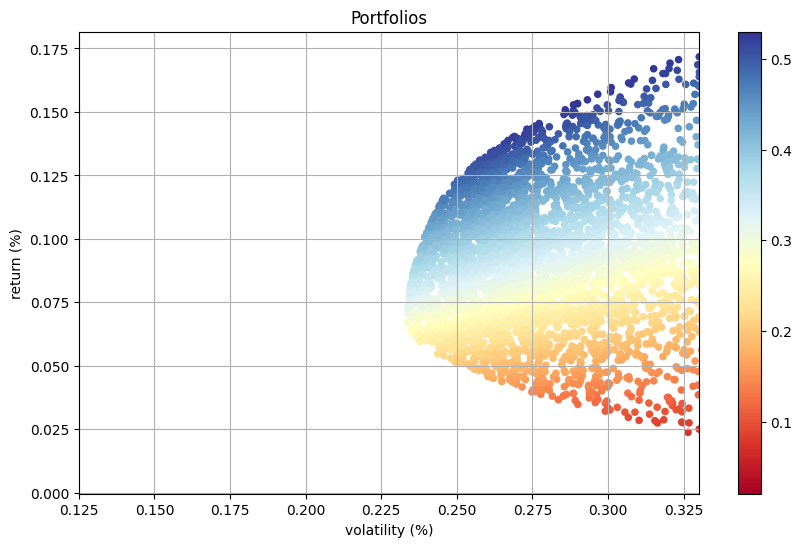

In [60]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], s=20, edgecolor=None, cmap='RdYlBu')
ax.set_title("Portfolios")
ax.set_ylabel("return (%)")
ax.grid()


ax.set_xlim([0.125,0.33])
ax.set_xlabel("volatility (%)")

fig.colorbar(im, ax=ax)
plt.show()

In [61]:
# یافتن پرتفو با پایین ترین ریسک
low_vol_portfolio = portfolios.iloc[ portfolios["volatility"].idxmin() ]
print(36 * "-")
print("Global Minimum Volatility portfolio:")
print(36 * "-")
print("- return      : {:.2f}%".format(low_vol_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(low_vol_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(low_vol_portfolio[2]) )


------------------------------------
Global Minimum Volatility portfolio:
------------------------------------
- return      : 6.71%
- volatility  : 23.36%
- sharpe ratio: 0.29


C:\Users\mahdi\AppData\Local\Temp\ipykernel_17844\1381213236.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("- return      : {:.2f}%".format(low_vol_portfolio[0]*100) )
C:\Users\mahdi\AppData\Local\Temp\ipykernel_17844\1381213236.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("- volatility  : {:.2f}%".format(low_vol_portfolio[1]*100) )
C:\Users\mahdi\AppData\Local\Temp\ipykernel_17844\1381213236.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a valu

In [62]:
# یافتن پرتفو با پایین ترین ریسک
low_vol_portfolio = portfolios.iloc[ portfolios["volatility"].idxmin() ]
print(36 * "-")
print("Global Minimum Volatility portfolio:")
print(36 * "-")
print("- return      : {:.2f}%".format(low_vol_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(low_vol_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(low_vol_portfolio[2]) )

# یافتن پرتفو با بالا ترین نسبت شارپ
high_sharpe_portfolio = portfolios.iloc[ portfolios['sharpe ratio'].idxmax() ]
print(36 * "-")
print("Maximum Sharpe Ratio portfolio:")
print(36 * "-")
print("- return      : {:.2f}%".format(high_sharpe_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(high_sharpe_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(high_sharpe_portfolio[2]) )

------------------------------------
Global Minimum Volatility portfolio:
------------------------------------
- return      : 6.71%
- volatility  : 23.36%
- sharpe ratio: 0.29
------------------------------------
Maximum Sharpe Ratio portfolio:
------------------------------------
- return      : 15.96%
- volatility  : 30.10%
- sharpe ratio: 0.53


C:\Users\mahdi\AppData\Local\Temp\ipykernel_17844\1364853294.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("- return      : {:.2f}%".format(low_vol_portfolio[0]*100) )
C:\Users\mahdi\AppData\Local\Temp\ipykernel_17844\1364853294.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("- volatility  : {:.2f}%".format(low_vol_portfolio[1]*100) )
C:\Users\mahdi\AppData\Local\Temp\ipykernel_17844\1364853294.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a valu

C:\Users\mahdi\AppData\Local\Temp\ipykernel_17844\4219325193.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(low_vol_portfolio[1],     low_vol_portfolio[0],     marker="X", color='g', s=120, label="GMV portfolio")
C:\Users\mahdi\AppData\Local\Temp\ipykernel_17844\4219325193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(high_sharpe_portfolio[1], high_sharpe_portfolio[0], marker="X", color='r', s=120, label="MSR portfolio")


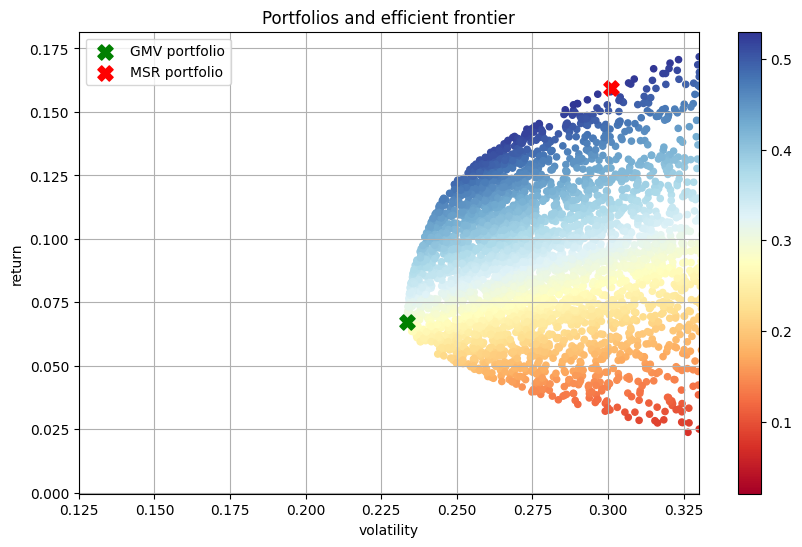

In [63]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], s=20, edgecolor=None, label=None, cmap='RdYlBu')
ax.set_title("Portfolios and efficient frontier")
ax.set_xlabel("volatility")
ax.set_ylabel("return")
ax.grid()

# مشخص کردن دو نقطه حساس ما در نمودار
ax.scatter(low_vol_portfolio[1],     low_vol_portfolio[0],     marker="X", color='g', s=120, label="GMV portfolio")
ax.scatter(high_sharpe_portfolio[1], high_sharpe_portfolio[0], marker="X", color='r', s=120, label="MSR portfolio")

ax.set_xlim([0.125,0.33])
ax.legend()

fig.colorbar(im, ax=ax)
plt.show()



در این نمودار تمامی 4000 پرتفو مد نظر را مشاهده میکنیم که میبینیم برای پرتفوها با بازدهی های مختلف چقدر ریسک کنیم

### در این نمودار دو پرتفو هستند که برای ما بسیار مهم اند و ما عاشق اینیم که اینها رو پیدا کنیم!!!
1. the **portfolio with the Global Minimum Volatility (GMV)**  (MVP)
2. the **portfolio with the Maximum Sharpe Ratio (MSR)**.

از کد بالا به راحتی می‌توانیم با مشاهده کمترین نوسان و بالاترین نسبت شارپ، این دو پورتفولیو را در دیتافریم خود بیابیم و وزن‌های مربوطه ذخیره شده را بازیابی کنیم.

 تابع زیر را تعریف می کنیم که زیرا چندین بار از آن استفاده خواهیم کرد  

In [64]:
def get_portfolio_features(weights, rets, covmat, risk_free_rate, periods_per_year):
    # portfolio volatility
 
    vol = ma.portfolio_vol(weights, covmat)
    vol = ma.annualize_vol(vol, periods_per_year)

    # portfolio return
    ret = ma.portfolio_return(weights, rets)

    # portfolio sharpe ratio
    shp = ma.sharpe_ratio(ret, risk_free_rate, periods_per_year, v=vol)

    print("Portfolio return:       {:.2f}%" .format(ret*100))
    print("Portfolio volatility:   {:.2f}%" .format(vol*100))
    print("Portfolio sharpe ratio: {:.2f}" .format(shp))
    
    return ret, vol, shp

### Finding the optimal portfolios: minimizing the volatility 

در آزمایش‌های بالا، با شبیه‌سازی تعداد بالایی از پورتفولیوها و سپس ترسیم آن‌ها، پورتفولیوهای بهینه را یافتیم، یعنی نمونه‌هایی که در مرز کارا هستند. از خود نمودار می توانستیم ببینیم که مرز کارا چگونه به نظر می رسد. با این حال، می‌توانیم با حل یک مسئله کمینه‌سازی، به عنوان مثال، با استفاده از روش بهینه‌سازی مرز کارا را پیدا کنیم.


برای مثال، فرض کنید می‌خواهیم پورتفولیویی (در مرز کارآمد) را پیدا کنیم که دارای حداقل نوسان است. سپس مشکل کمینه سازی این است:

$$
\text{minimize} \;\; \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w}, 
$$
 
$$
\begin{cases}
\mathbf{w}^T \mathbf{1} = 1, \\
0 \leq \mathbf{w} \leq 1.
\end{cases}
$$

In [65]:
#  کل بازده (سالانه) شرکت هایی را که در آنها سرمایه گذاری می کنیم ببینیم
ann_rets = annualize_rets(daily_rets, periods_per_year)
ann_rets

AMZN    0.001959
KO      0.027745
MSFT    0.057716
dtype: float64

In [66]:
cov_rets

,AMZN,KO,MSFT
AMZN,0.000610,0.000109,0.000380
KO,0.000109,0.000246,0.000177
MSFT,0.000380,0.000177,0.000485


In [67]:
ann_rets

AMZN    0.001959
KO      0.027745
MSFT    0.057716
dtype: float64

In [68]:
ann_rets

AMZN    0.001959
KO      0.027745
MSFT    0.057716
dtype: float64

In [69]:
cov_rets

,AMZN,KO,MSFT
AMZN,0.000610,0.000109,0.000380
KO,0.000109,0.000246,0.000177
MSFT,0.000380,0.000177,0.000485


In [70]:
optimal_weights = ma.minimize_volatility(ann_rets, cov_rets)
print("optimal weights:")
print(18 * "-")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
------------------
  AMZN: 21.44%
  KO:   78.56%
  MSFT: 0.00%


In [71]:
target_return = 0.16

اکنون ما با فراخواندن تابع حداقل کننده می آییم مسئله را با محدودیت جدید حل میکنیم

In [72]:
optimal_weights = ma.minimize_volatility(ann_rets, cov_rets, target_return)
print("optimal weights:")
print(22*"-")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
----------------------
  AMZN: 0.00%
  KO:   0.00%
  MSFT: 100.00%


In [73]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

Portfolio return:       5.77%
Portfolio volatility:   34.98%
Portfolio sharpe ratio: 0.17


In [74]:
optimal_weights = ma.minimize_volatility(ann_rets, cov_rets, 0.4)
print("optimal weights:")
print(22*"-")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
----------------------
  AMZN: 0.00%
  KO:   0.00%
  MSFT: 100.00%


In [75]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

Portfolio return:       5.77%
Portfolio volatility:   34.98%
Portfolio sharpe ratio: 0.17


In [76]:
daily_rets=daily_rets.dropna()

In [77]:
daily_rets.reset_index(drop=True, inplace=True)

In [78]:
daily_rets

,AMZN,KO,MSFT
0,-0.012139,-0.005456,-0.012452
1,0.014886,-0.000365,0.002585
2,0.002092,-0.007682,-0.009118
3,-0.007809,0.001843,0.015928
4,0.004799,0.018215,0.012493
...,...,...,...
729,0.009979,0.004491,0.010407
730,-0.007649,0.000958,-0.000364
731,0.005781,0.000160,-0.023152
732,-0.016285,-0.003509,-0.005915


In [79]:
X_train = np.array(range(734)).reshape(-1, 1)  # ایجاد اندیس به عنوان ویژگی
y_train = daily_rets.copy()

In [80]:
y_train

,AMZN,KO,MSFT
0,-0.012139,-0.005456,-0.012452
1,0.014886,-0.000365,0.002585
2,0.002092,-0.007682,-0.009118
3,-0.007809,0.001843,0.015928
4,0.004799,0.018215,0.012493
...,...,...,...
729,0.009979,0.004491,0.010407
730,-0.007649,0.000958,-0.000364
731,0.005781,0.000160,-0.023152
732,-0.016285,-0.003509,-0.005915


In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [82]:
# تقسیم داده‌ها به نسبت ۸۰ درصد آموزش و ۲۰ درصد تست
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

# آموزش مدل رگرسیون خطی با داده‌های آموزش
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

# ارزیابی دقت مدل با داده‌های تست
accuracy = model.score(x_test, y_test)
print(f"دقت مدل: {accuracy:.2f}")

دقت مدل: -0.01


In [83]:
x_train.shape

(587, 1)

In [84]:
y_train.shape

(587, 3)

In [85]:
from sklearn.ensemble import RandomForestRegressor

# ایجاد مدل Random Forest با ۱۰۰ درخت
rf_model = RandomForestRegressor(n_estimators=100, random_state=10)

# آموزش مدل با داده‌های آموزش
rf_model.fit(x_train, y_train)

# ارزیابی دقت مدل با داده‌های تست
rf_accuracy = rf_model.score(x_test, y_test)
print(f"دقت مدل Random Forest: {rf_accuracy:.2f}")


دقت مدل Random Forest: -0.43


In [86]:
from sklearn.neural_network import MLPRegressor



model = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', max_iter=500)
model.fit(x_train, y_train)
    
    # پیش‌بینی قیمت برای روز i
predicted_price_tomorrow = model.predict([[455]])
rf_accuracy = rf_model.score(x_test, y_test) 
rf_accuracy

-0.42760432864022885

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:

mlp = MLPRegressor()

# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': [(50,), (100,), (200,)], 'alpha': [0.1, 0.5, 1], 'learning_rate': ['constant', 'invscaling', 'adaptive']}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best hyperparameters:  {'alpha': 1, 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive'}
Best: -0.000659 using {'alpha': 1, 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive'}


In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# تعریف مدل
rf = RandomForestRegressor(random_state=4)

# تعریف دیکشنری پارامترها برای جستجوی گرید
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
   
    'min_samples_leaf': [1, 2, 4],
    
}

# ایجاد شیء GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# آموزش مدل با استفاده از جستجوی گرید
grid_search.fit(x_train, y_train)

# چاپ بهترین پارامترها
print("بهترین پارامترها: ", grid_search.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
بهترین پارامترها:  {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 300}


In [90]:
from sklearn.ensemble import RandomForestRegressor

# ایجاد مدل Random Forest با بهترین پارامترها
best_rf_model = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                     
                        
                                    
                                      random_state=10)

# آموزش مدل با داده‌های آموزشی
best_rf_model.fit(x_train, y_train)

# ارزیابی دقت مدل با داده‌های تست
best_rf_accuracy = best_rf_model.score(x_test, y_test)
print(f"دقت مدل Random Forest با بهترین پارامترها: {best_rf_accuracy:.2f}")


دقت مدل Random Forest با بهترین پارامترها: -0.18


In [91]:

mlp = MLPRegressor()

# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': [(50,), (100,), (200,)], 'alpha': [0.1, 0.5, 1], 'learning_rate': ['constant', 'invscaling', 'adaptive']}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best hyperparameters:  {'alpha': 1, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant'}
Best: -0.000602 using {'alpha': 1, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant'}


In [92]:
# ایجاد یک نمونه جدید از MLPRegressor با بهترین پارامترها
best_mlp = MLPRegressor(hidden_layer_sizes=grid_search.best_params_['hidden_layer_sizes'],
                        alpha=grid_search.best_params_['alpha'],
                        learning_rate=grid_search.best_params_['learning_rate'])

# آموزش مدل با داده‌های آموزشی
best_mlp.fit(x_train, y_train)

# اکنون می‌توانید از مدل آموزش دیده برای پیش‌بینی‌ها استفاده کنید
# مثلاً برای پیش‌بینی داده‌های تست:
predictions = best_mlp.predict(x_test)
rf_accuracy = best_mlp.score(x_test, y_test) 
rf_accuracy

-0.14130975442786564

In [93]:
pip install torch


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\mahdi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
